In [1]:
import networkx as nx
from pykeen.pipeline import pipeline
from pykeen.datasets import Nations, get_dataset
import matplotlib.pyplot as plt
import matplotlib as mpl
import torch
from pykeen.models import predict
from pykeen.evaluation import evaluate, RankBasedEvaluator
from pykeen.metrics.ranking import HitsAtK
import pandas as pd
from pykeen.trackers import ConsoleResultTracker

seed = 1234

In [2]:
def show_metrics(dictionary):
    for key in dictionary.keys():
        print(key)
        display(pd.DataFrame(dictionary[key]))

For transE, and therefore for transductive link prediction, it is necessary that all the entities and relations are present in the train set

In [3]:
from pykeen.hpo import hpo_pipeline
import os
from pykeen.triples import TriplesFactory


NATIONS_TRAIN_PATH = "MSCallGraph_0_train_transductive.tsv"
NATIONS_TEST_PATH = "MSCallGraph_0_test_transductive.tsv"
NATIONS_VALIDATE_PATH = "MSCallGraph_0_validation_transductive.tsv"


training = TriplesFactory.from_path(NATIONS_TRAIN_PATH)
testing = TriplesFactory.from_path(
    NATIONS_TEST_PATH,
    entity_to_id=training.entity_to_id,
    relation_to_id=training.relation_to_id,
)
validation = TriplesFactory.from_path(
    NATIONS_VALIDATE_PATH,
    entity_to_id=training.entity_to_id,
    relation_to_id=training.relation_to_id,
)

pipeline_result = pipeline(
#    n_trials=3,  # you probably want more than this
    training=training,
    testing=testing,
    validation=validation,
    model='TransE',
    epochs=5,  # short epochs for testing - you should go higher
    random_seed = seed)
pipeline_result.save_to_directory(os.getcwd()+'/MSCallGraph0_transE_transductive')

No cuda devices were available. The model runs on CPU


Training epochs on cpu:   0%|          | 0/5 [00:00<?, ?epoch/s]

Training batches on cpu:   0%|          | 0/41 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/41 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/41 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/41 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/41 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Currently automatic memory optimization only supports GPUs, but you're using a CPU. Therefore, the batch_size will be set to the default value.
INFO:pykeen.evaluation.evaluator:No evaluation batch_size provided. Setting batch_size to '32'.


Evaluating on cpu:   0%|          | 0.00/3.27k [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 8.86s seconds
INFO:pykeen.triples.triples_factory:Stored TriplesFactory(num_entities=7386, num_relations=6, create_inverse_triples=False, num_triples=10381, path="C:\Users\gianl\OneDrive - Politecnico di Milano\Master Thesis\python\Alibaba\MSCallGraph\MSCallGraph_0_train_transductive.tsv") to file:///C:/Users/gianl/OneDrive%20-%20Politecnico%20di%20Milano/Master%20Thesis/python/Alibaba/MSCallGraph/MSCallGraph0_transE_transductive/training_triples
INFO:pykeen.pipeline.api:Saved to directory: file:///C:/Users/gianl/OneDrive%20-%20Politecnico%20di%20Milano/Master%20Thesis/python/Alibaba/MSCallGraph/MSCallGraph0_transE_transductive


In [4]:
# result on the test set
show_metrics(pipeline_result.metric_results.to_dict())

head


,optimistic,realistic,pessimistic
adjusted_geometric_mean_rank_index,3.316554e-01,3.316544e-01,3.316537e-01
harmonic_mean_rank,4.563040e+01,4.563040e+01,4.563040e+01
median_absolute_deviation,2.706490e+03,2.706490e+03,2.706490e+03
variance,4.528805e+06,4.528802e+06,4.528800e+06
inverse_geometric_mean_rank,5.542664e-04,5.542656e-04,5.542650e-04
adjusted_inverse_harmonic_mean_rank,2.064896e-02,2.064896e-02,2.064896e-02
median_rank,2.874500e+03,2.874500e+03,2.874500e+03
adjusted_arithmetic_mean_rank,8.426586e-01,8.426591e-01,8.426597e-01
standard_deviation,2.128099e+03,2.128098e+03,2.128098e+03
z_arithmetic_mean_rank,1.558513e+01,1.558508e+01,1.558503e+01


tail


,optimistic,realistic,pessimistic
adjusted_geometric_mean_rank_index,5.646165e-01,5.646165e-01,5.646162e-01
harmonic_mean_rank,4.045369e+01,4.045369e+01,4.045369e+01
median_absolute_deviation,2.349925e+03,2.349925e+03,2.349925e+03
variance,4.451544e+06,4.451544e+06,4.451544e+06
inverse_geometric_mean_rank,8.465100e-04,8.465100e-04,8.465095e-04
adjusted_inverse_harmonic_mean_rank,2.346248e-02,2.346248e-02,2.346248e-02
median_rank,1.986500e+03,1.986500e+03,1.986500e+03
adjusted_arithmetic_mean_rank,6.747060e-01,6.747060e-01,6.747062e-01
standard_deviation,2.109868e+03,2.109868e+03,2.109868e+03
z_arithmetic_mean_rank,3.222289e+01,3.222288e+01,3.222286e+01


both


,optimistic,realistic,pessimistic
adjusted_geometric_mean_rank_index,4.605193e-01,4.605189e-01,4.605184e-01
harmonic_mean_rank,4.288639e+01,4.288639e+01,4.288639e+01
median_absolute_deviation,2.586400e+03,2.586400e+03,2.586400e+03
variance,4.581342e+06,4.581342e+06,4.581341e+06
inverse_geometric_mean_rank,6.849760e-04,6.849754e-04,6.849749e-04
adjusted_inverse_harmonic_mean_rank,2.205573e-02,2.205572e-02,2.205572e-02
median_rank,2.403000e+03,2.403000e+03,2.403000e+03
adjusted_arithmetic_mean_rank,7.584825e-01,7.584828e-01,7.584831e-01
standard_deviation,2.140407e+03,2.140407e+03,2.140407e+03
z_arithmetic_mean_rank,3.383300e+01,3.383295e+01,3.383290e+01


<AxesSubplot:title={'center':'Losses Plot'}, xlabel='Epoch', ylabel='marginranking Loss'>

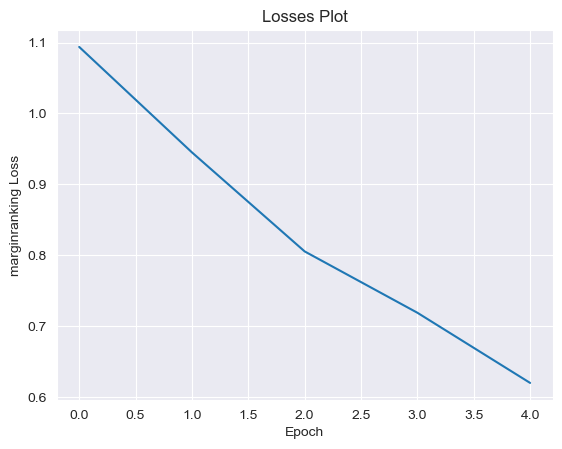

In [5]:
pipeline_result.plot_losses()

In [6]:
model = pipeline_result.model
# Predict tails and see if they are in the train set
predicted_tails_df = predict.get_prediction_df(
    model=model, head_label = "84f9f68ef003a21288fffe8f9a09a5a29b05f4cc4229b8337d1e3c28b6d07923", relation_label="rpc", triples_factory=pipeline_result.training,
)


predicted_tails_df

,tail_id,tail_label,score,in_training
3860,3860,84f9f68ef003a21288fffe8f9a09a5a29b05f4cc4229b8...,-5.167881,False
2656,2656,5ce47b2e8b8eef77d80c9d4c51f191f2379a932897b302...,-6.169989,False
908,908,20a5fd89dcada9e58549998e69130528834af1a316797b...,-6.214561,False
4151,4151,900cf4e13e1431e7df016a9f8e7f8c88bae7807470baa3...,-6.228168,False
6945,6945,f1031bf564361e3c0331a1605a6043f27417226e502f8a...,-6.281761,False
...,...,...,...,...
456,456,0fea36f8ed830148cd67e5dd0037864e44d63574ffc058...,-10.837081,False
3567,3567,7b332dd159b97faab178ffd6782f26898d4a78720356e5...,-10.844541,False
5684,5684,c4e724aa432298ca987779a0ec428c164677a1837888d1...,-10.898327,False
4946,4946,aadfaec2d4442a3e8d1162b57a27f1aaced94aff2f7aa4...,-11.110087,False


In [7]:
model = pipeline_result.model
# Predict tails and see if they are in the validation set
predicted_tails_df = predict.get_prediction_df(
    model=model, head_label = "84f9f68ef003a21288fffe8f9a09a5a29b05f4cc4229b8337d1e3c28b6d07923", relation_label="rpc", triples_factory=validation,
)


predicted_tails_df

,tail_id,tail_label,score,in_training
3860,3860,84f9f68ef003a21288fffe8f9a09a5a29b05f4cc4229b8...,-5.167881,False
2656,2656,5ce47b2e8b8eef77d80c9d4c51f191f2379a932897b302...,-6.169989,False
908,908,20a5fd89dcada9e58549998e69130528834af1a316797b...,-6.214561,False
4151,4151,900cf4e13e1431e7df016a9f8e7f8c88bae7807470baa3...,-6.228168,False
6945,6945,f1031bf564361e3c0331a1605a6043f27417226e502f8a...,-6.281761,False
...,...,...,...,...
456,456,0fea36f8ed830148cd67e5dd0037864e44d63574ffc058...,-10.837081,False
3567,3567,7b332dd159b97faab178ffd6782f26898d4a78720356e5...,-10.844541,False
5684,5684,c4e724aa432298ca987779a0ec428c164677a1837888d1...,-10.898327,False
4946,4946,aadfaec2d4442a3e8d1162b57a27f1aaced94aff2f7aa4...,-11.110087,False


In [8]:
model = pipeline_result.model
# Predict tails and see if they are in the test set
predicted_tails_df = predict.get_prediction_df(
    model=model, head_label = "84f9f68ef003a21288fffe8f9a09a5a29b05f4cc4229b8337d1e3c28b6d07923", relation_label="rpc", triples_factory=testing,
)


predicted_tails_df

,tail_id,tail_label,score,in_training
3860,3860,84f9f68ef003a21288fffe8f9a09a5a29b05f4cc4229b8...,-5.167881,False
2656,2656,5ce47b2e8b8eef77d80c9d4c51f191f2379a932897b302...,-6.169989,False
908,908,20a5fd89dcada9e58549998e69130528834af1a316797b...,-6.214561,False
4151,4151,900cf4e13e1431e7df016a9f8e7f8c88bae7807470baa3...,-6.228168,False
6945,6945,f1031bf564361e3c0331a1605a6043f27417226e502f8a...,-6.281761,False
...,...,...,...,...
456,456,0fea36f8ed830148cd67e5dd0037864e44d63574ffc058...,-10.837081,False
3567,3567,7b332dd159b97faab178ffd6782f26898d4a78720356e5...,-10.844541,False
5684,5684,c4e724aa432298ca987779a0ec428c164677a1837888d1...,-10.898327,False
4946,4946,aadfaec2d4442a3e8d1162b57a27f1aaced94aff2f7aa4...,-11.110087,False


In [9]:
# Predict relations
predicted_relations_df = predict.get_prediction_df(
    model=model, head_label="84f9f68ef003a21288fffe8f9a09a5a29b05f4cc4229b8337d1e3c28b6d07923", tail_label="75e56c8fbb9336eb4dd40f5f609d5344203d374d73fd0b8d2bce19f754070f6a", triples_factory=pipeline_result.training,
)
predicted_relations_df

,relation_id,relation_label,score,in_training
4,4,rpc,-8.013196,True
2,2,mc,-9.244696,False
0,0,db,-10.402159,False
3,3,mq,-10.655874,False
1,1,http,-10.817895,False
5,5,userDefined,-11.631045,False


In [10]:
# Predict heads
predicted_heads_df = predict.get_prediction_df(
    model=model, relation_label="rpc", tail_label="75e56c8fbb9336eb4dd40f5f609d5344203d374d73fd0b8d2bce19f754070f6a", triples_factory=pipeline_result.training
)
predicted_heads_df

,head_id,head_label,score,in_training
3416,3416,75e56c8fbb9336eb4dd40f5f609d5344203d374d73fd0b...,-5.167881,True
7086,7086,f5870687ca34a45aceb2c1ef0c078aeb9e750a5dd08c92...,-6.047532,False
5079,5079,af5dbc03d475bcde50a4ad108e76606cf940380d64578c...,-6.198233,False
2360,2360,51e2137b9deeb6903e6d1911aa316daa2dfa5fd20883a0...,-6.327259,False
7137,7137,f74fa5aae1f90ebf2891147666cb93d75eb9bbd825b22a...,-6.338790,False
...,...,...,...,...
4580,4580,9ef909ebc030a74059317ecc5aff2559f4a9a2f3599d87...,-10.898727,False
4122,4122,8f01629d0607630f1263b16f64220ae52965ca0333c6f6...,-10.904349,False
4383,4383,987faa5c6135f34d4dfc2160b69f76f6700776398740f8...,-10.938227,False
4262,4262,9363bea60614365288df17611b8250082c26492b49683c...,-11.056043,False


In [11]:
# # Score all triples (memory intensive)
# predictions_df = predict.get_all_prediction_df(model, triples_factory=pipeline_result.training)
# predictions_df

In [12]:
# Score top K triples (computationally expensive)
top_k_predictions_df = predict.get_all_prediction_df(model, k=10, triples_factory=pipeline_result.training)
top_k_predictions_df

scoring:   0%|          | 0.00/44.3k [00:00<?, ?batch/s]

,head_id,head_label,relation_id,relation_label,tail_id,tail_label,score,in_training
0,406,0e74103df88e616d6673812b6186ee304b100bd8cdf743...,4,rpc,7354,feb0593ddc6b4081d52e5c3abe574702d2d447d7a1d608...,-5.013833,False
1,717,19aec9abea342afb45c818d5bf68c2cfcd8aae12c712e3...,1,http,490,10f66ea7b507bba4641ea2f875a9765e292e3e878c6e17...,-5.027528,False
2,1027,255563d8b744e968dd6420e09cdd123d4597ca2320ef8d...,4,rpc,4624,a05baae20b82b8002c8087f0a3e8b9c2b19908c40ed0f8...,-5.066064,False
3,3715,803b003f7c18e5f655b75264079645c9120aba02a3672b...,4,rpc,5817,ca20d3d50d54ebb22b1eb937fc830bd5643574956862ad...,-5.087399,False
4,2560,59a9c02bb71a62c8837dab1ba69b0ad3e9e38399974a66...,3,mq,1264,2d80e774b939bee7f42982ae43ab076e64d4b1b5d0ec09...,-5.128573,False
5,5980,d05638849b50f2b07f832858efa43e664b99858c04b176...,4,rpc,5631,c2ffb638dc6b0fc561f4f6de88cc9134a6462d8fbdfeea...,-5.140664,False
6,160,05a114ebf76a191c3cbd6e178f1df6e12d4d41ee88c93e...,4,rpc,5570,c0ba93673889014e6f84e5f91f024816c526294549238c...,-5.159028,False
7,78,02bc4b3ab9273901ec7e2c60ec92eb8a21df4d788b051d...,4,rpc,78,02bc4b3ab9273901ec7e2c60ec92eb8a21df4d788b051d...,-5.167881,False
8,443,0f75e54b748a90061a86cc485288a81323be1d8554cc5f...,4,rpc,443,0f75e54b748a90061a86cc485288a81323be1d8554cc5f...,-5.167881,False
9,446,0fa0285ce82c6a4a38b6cafd190312c89cf329936455ca...,4,rpc,446,0fa0285ce82c6a4a38b6cafd190312c89cf329936455ca...,-5.167881,False


In [13]:
# Score a given list of triples
score_df = predict.predict_triples_df(
    model=model,
    triples=[('84f9f68ef003a21288fffe8f9a09a5a29b05f4cc4229b8337d1e3c28b6d07923',
              'rpc',
              '75e56c8fbb9336eb4dd40f5f609d5344203d374d73fd0b8d2bce19f754070f6a'),
             ('01d660afcfadafd587e20ec4c04ddbc7eb0de95643ba0eec5fc1aeb15e341a85',
              'mc',
              '4ab265f54516248ee8873be7d6441912456ce17e84f39918e01ddc4210e56da5')],
    triples_factory=pipeline_result.training,
)
score_df

,head_id,head_label,relation_id,relation_label,tail_id,tail_label,score
0,47,01d660afcfadafd587e20ec4c04ddbc7eb0de95643ba0e...,2,mc,2142,4ab265f54516248ee8873be7d6441912456ce17e84f399...,-8.749856
1,3860,84f9f68ef003a21288fffe8f9a09a5a29b05f4cc4229b8...,4,rpc,3416,75e56c8fbb9336eb4dd40f5f609d5344203d374d73fd0b...,-8.013196


## Evaluation
If the results are the same, it means that the traces are the same

### Rank Based Evaluator

inverse harmonic mean rank == mean reciprocal rank https://cthoyt.com/2021/04/19/pythagorean-mean-ranks.html

Pykeen does not allow for a raw evaluation, filtered only.

In [14]:
results_training_filtered = evaluate(model=model,mapped_triples=pipeline_result.training.mapped_triples,
                            evaluator = RankBasedEvaluator(filtered = True,metrics = ['meanreciprocalrank', HitsAtK(1),
                                                                                      HitsAtK(3), HitsAtK(5), HitsAtK(10)],
                                                          add_defaults = False),mode=None,
                            additional_filter_triples=[pipeline_result.training.mapped_triples])
print("Training filtered evaluation")
show_metrics(results_training_filtered.to_dict())

INFO:pykeen.evaluation.evaluator:No evaluation batch_size provided. Setting batch_size to '32'.


Evaluating on cpu:   0%|          | 0.00/10.4k [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 28.06s seconds


Training filtered evaluation
head


,optimistic,realistic,pessimistic
inverse_harmonic_mean_rank,0.015982,0.015982,0.015982
hits_at_1,0.013390,0.013390,0.013390
hits_at_3,0.014064,0.014064,0.014064
hits_at_5,0.014546,0.014546,0.014546
hits_at_10,0.015894,0.015894,0.015894


tail


,optimistic,realistic,pessimistic
inverse_harmonic_mean_rank,0.025619,0.025619,0.025619
hits_at_1,0.013197,0.013197,0.013197
hits_at_3,0.020422,0.020422,0.020422
hits_at_5,0.026009,0.026009,0.026009
hits_at_10,0.041711,0.041711,0.041711


both


,optimistic,realistic,pessimistic
inverse_harmonic_mean_rank,0.020801,0.020801,0.020801
hits_at_1,0.013294,0.013294,0.013294
hits_at_3,0.017243,0.017243,0.017243
hits_at_5,0.020277,0.020277,0.020277
hits_at_10,0.028803,0.028803,0.028803


In [15]:
results_validation_filtered = evaluate(model=model,mapped_triples=validation.mapped_triples,
                            evaluator = RankBasedEvaluator(filtered = True,metrics = ['meanreciprocalrank', HitsAtK(1),
                                                                                      HitsAtK(3), HitsAtK(5), HitsAtK(10)],
                                                          add_defaults = False),mode=None,
                            additional_filter_triples=[pipeline_result.training.mapped_triples])
print("Validation filtered evaluation")
show_metrics(results_validation_filtered.to_dict())

INFO:pykeen.evaluation.evaluator:No evaluation batch_size provided. Setting batch_size to '32'.


Evaluating on cpu:   0%|          | 0.00/2.57k [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 6.81s seconds


Validation filtered evaluation
head


,optimistic,realistic,pessimistic
inverse_harmonic_mean_rank,0.019038,0.019038,0.019038
hits_at_1,0.016342,0.016342,0.016342
hits_at_3,0.017510,0.017510,0.017510
hits_at_5,0.019455,0.019455,0.019455
hits_at_10,0.021790,0.021790,0.021790


tail


,optimistic,realistic,pessimistic
inverse_harmonic_mean_rank,0.022468,0.022468,0.022468
hits_at_1,0.017510,0.017510,0.017510
hits_at_3,0.021790,0.021790,0.021790
hits_at_5,0.023346,0.023346,0.023346
hits_at_10,0.026070,0.026070,0.026070


both


,optimistic,realistic,pessimistic
inverse_harmonic_mean_rank,0.020753,0.020753,0.020753
hits_at_1,0.016926,0.016926,0.016926
hits_at_3,0.019650,0.019650,0.019650
hits_at_5,0.021401,0.021401,0.021401
hits_at_10,0.023930,0.023930,0.023930


In [16]:
results_testing_filtered = evaluate(model=model,mapped_triples=testing.mapped_triples,
                            evaluator = RankBasedEvaluator(filtered = True,metrics = ['meanreciprocalrank', HitsAtK(1),
                                                                                      HitsAtK(3), HitsAtK(5), HitsAtK(10)],
                                                          add_defaults = False),mode=None,
                            additional_filter_triples=[pipeline_result.training.mapped_triples,
                                                      validation.mapped_triples])
print("Testing filtered evaluation")
show_metrics(results_testing_filtered.to_dict())

INFO:pykeen.evaluation.evaluator:No evaluation batch_size provided. Setting batch_size to '32'.


Evaluating on cpu:   0%|          | 0.00/3.27k [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 8.73s seconds


Testing filtered evaluation
head


,optimistic,realistic,pessimistic
inverse_harmonic_mean_rank,0.021915,0.021915,0.021915
hits_at_1,0.019572,0.019572,0.019572
hits_at_3,0.021101,0.021101,0.021101
hits_at_5,0.021713,0.021713,0.021713
hits_at_10,0.023853,0.023853,0.023853


tail


,optimistic,realistic,pessimistic
inverse_harmonic_mean_rank,0.024720,0.024720,0.024720
hits_at_1,0.020489,0.020489,0.020489
hits_at_3,0.022936,0.022936,0.022936
hits_at_5,0.024159,0.024159,0.024159
hits_at_10,0.028746,0.028746,0.028746


both


,optimistic,realistic,pessimistic
inverse_harmonic_mean_rank,0.023317,0.023317,0.023317
hits_at_1,0.020031,0.020031,0.020031
hits_at_3,0.022018,0.022018,0.022018
hits_at_5,0.022936,0.022936,0.022936
hits_at_10,0.026300,0.026300,0.026300
